In [1]:
# Core Imports
import numpy as np
from utils.data import getClassifierData
from utils.reporter import ModelEvaluationHarness
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Implementation Specific Imports
from sklearn.linear_model import LogisticRegression as Classifier


In [2]:
preppedData, preppedTarget = getClassifierData()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy :
 0.7198333333333333
precision :
 0.7403598121568887
recall :
 0.6778393435673843
f1 :
 0.7077214889749467
classificationReport :
               precision    recall  f1-score   support

       False       0.70      0.76      0.73     32973
        True       0.74      0.68      0.71     33027

    accuracy                           0.72     66000
   macro avg       0.72      0.72      0.72     66000
weighted avg       0.72      0.72      0.72     66000

confusionMatrix :
 [[25122  7851]
 [10640 22387]]
roc_curve :
 {'fpr': array([0.       , 0.2381039, 1.       ]), 'tpr': array([0.        , 0.67783934, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.7198677201869312


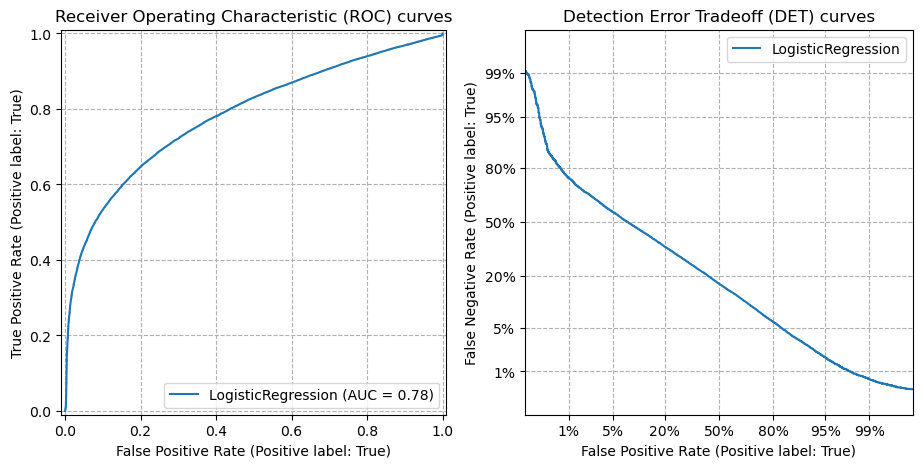

In [3]:
defaultModel = ModelEvaluationHarness(
    Classifier(),
    Classifier.__name__,
    preppedData,
    preppedTarget
    )

defaultModel.splitData()
defaultModel.train()
defaultModel.predict()
defaultModel.evaluate()
defaultModel.graphROC()
for valuation, value in defaultModel.evaluation.items():
    print(valuation ,':\n', value)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=10000. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:

accuracy :
 0.7184848484848485
precision :
 0.735117013312502
recall :
 0.6838344384897206
f1 :
 0.7085490196078431
classificationReport :
               precision    recall  f1-score   support

       False       0.70      0.75      0.73     32973
        True       0.74      0.68      0.71     33027

    accuracy                           0.72     66000
   macro avg       0.72      0.72      0.72     66000
weighted avg       0.72      0.72      0.72     66000

confusionMatrix :
 [[24835  8138]
 [10442 22585]]
roc_curve :
 {'fpr': array([0.        , 0.24680799, 1.        ]), 'tpr': array([0.        , 0.68383444, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.7185132220350219


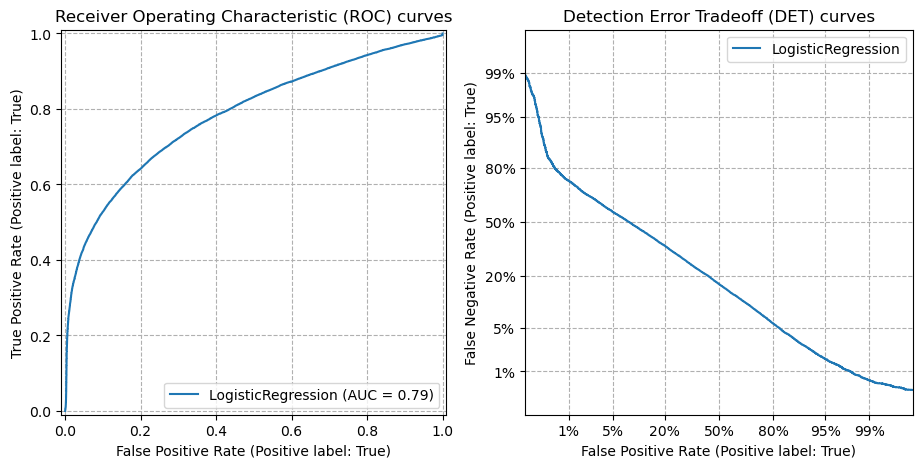

In [4]:
param_bounds = {
            'dual': [True, False],
            'class_weight': [None, 'balanced'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag','saga']
        }

"""Identify Optimal Configuration"""
search = HalvingRandomSearchCV(Classifier(), param_bounds)
search = search.fit(preppedData, preppedTarget)


"""Harness Classifier with Optimal Configuration"""
tuned_evaluator = ModelEvaluationHarness(
    Classifier(**search.best_estimator_.get_params()),
    Classifier.__name__,
    preppedData,
    preppedTarget
)

"""Evaluate Model"""
tuned_evaluator.splitData()
tuned_evaluator.train()
tuned_evaluator.predict()
tuned_evaluator.evaluate()
tuned_evaluator.graphROC()
for valuation, value in tuned_evaluator.evaluation.items():
    print(valuation ,':\n', value)